<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/MLE_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observed: 7 heads, 3 tails in 10 flips


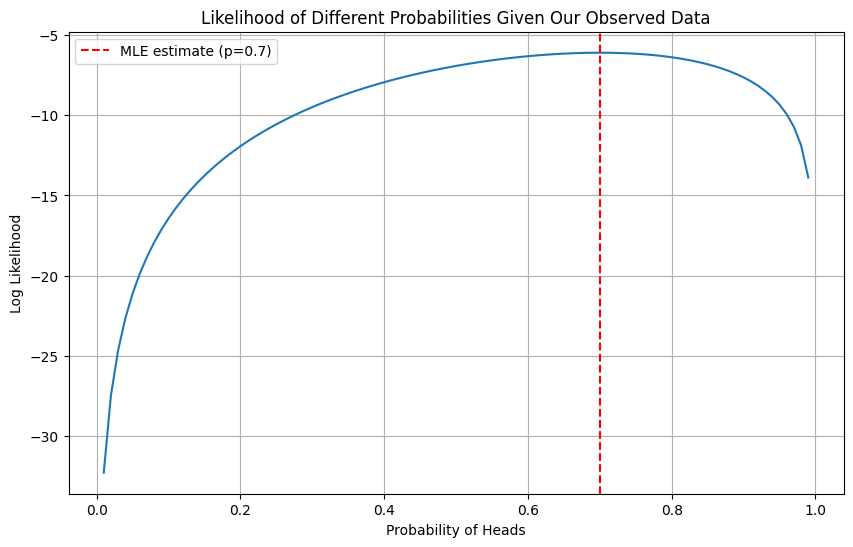


MLE estimate: p = 0.700

If p = 0.3:
Probability of seeing exactly HTHTHHHHTH = 0.000075

If p = 0.5:
Probability of seeing exactly HTHTHHHHTH = 0.000977

If p = 0.7:
Probability of seeing exactly HTHTHHHHTH = 0.002224

If p = 0.9:
Probability of seeing exactly HTHTHHHHTH = 0.000478


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Our observed sequence
sequence = 'HTHTHHHHTH'

# Count heads and tails
n_heads = sum(1 for x in sequence if x == 'H')
n_tails = len(sequence) - n_heads

print(f"Observed: {n_heads} heads, {n_tails} tails in {len(sequence)} flips")

# Function to compute negative log likelihood
# (we minimize negative log likelihood instead of maximizing likelihood)
def neg_log_likelihood(p):
    if p <= 0 or p >= 1:  # probability must be between 0 and 1
        return float('inf')
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities to show likelihood
ps = np.linspace(0.01, 0.99, 99)
likelihoods = [-neg_log_likelihood(p) for p in ps]

# Plot likelihood for different probabilities
plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods)
plt.axvline(x=0.7, color='r', linestyle='--', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood of Different Probabilities Given Our Observed Data')
plt.grid(True)
plt.legend()
plt.show()

# Find the maximum likelihood estimate
result = minimize(neg_log_likelihood, x0=0.5)
mle_p = result.x[0]

print(f"\nMLE estimate: p = {mle_p:.3f}")

# Calculate probability of our exact sequence for different p values
p_values = [0.3, 0.5, 0.7, 0.9]
for p in p_values:
    prob = (p ** n_heads) * ((1-p) ** n_tails)
    print(f"\nIf p = {p}:")
    print(f"Probability of seeing exactly HTHTHHHHTH = {prob:.6f}")

Sequence 1 (HTHTHHHHTH): 7 heads, 3 tails
Sequence 2 (HHHHHHHTTT): 7 heads, 3 tails


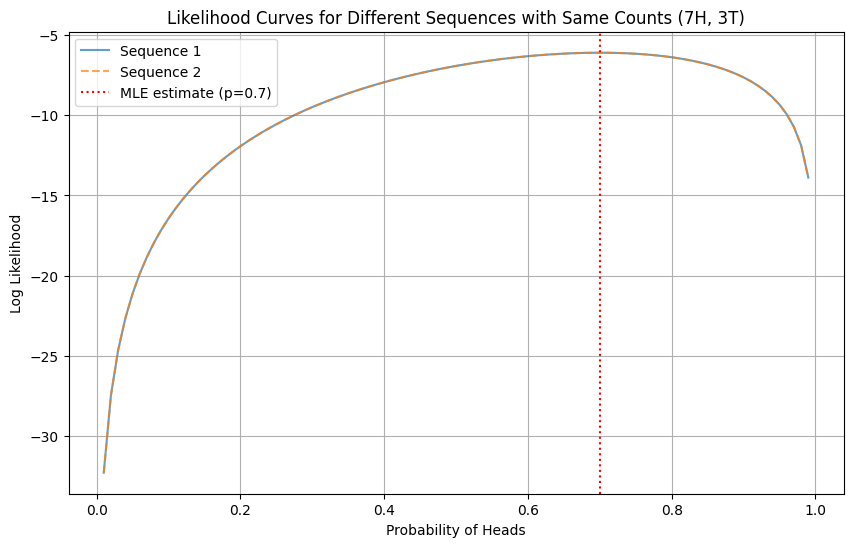


MLE estimate for sequence 1: p = 0.700
MLE estimate for sequence 2: p = 0.700


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Let's test two different sequences with same H/T ratio
sequence1 = 'HTHTHHHHTH'  # original sequence
sequence2 = 'HHHHHHHTTT'  # different sequence, same counts

# Count function
def get_counts(sequence):
    n_heads = sum(1 for x in sequence if x == 'H')
    n_tails = len(sequence) - n_heads
    return n_heads, n_tails

# Get counts for both sequences
n_heads1, n_tails1 = get_counts(sequence1)
n_heads2, n_tails2 = get_counts(sequence2)

print(f"Sequence 1 ({sequence1}): {n_heads1} heads, {n_tails1} tails")
print(f"Sequence 2 ({sequence2}): {n_heads2} heads, {n_tails2} tails")

# Function to compute negative log likelihood (using counts only!)
def neg_log_likelihood(p, n_heads, n_tails):
    if p <= 0 or p >= 1:
        return float('inf')
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities
ps = np.linspace(0.01, 0.99, 99)
likelihoods1 = [-neg_log_likelihood(p, n_heads1, n_tails1) for p in ps]
likelihoods2 = [-neg_log_likelihood(p, n_heads2, n_tails2) for p in ps]

# Plot to show they're identical
plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods1, label='Sequence 1', alpha=0.7)
plt.plot(ps, likelihoods2, '--', label='Sequence 2', alpha=0.7)
plt.axvline(x=0.7, color='r', linestyle=':', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood Curves for Different Sequences with Same Counts (7H, 3T)')
plt.grid(True)
plt.legend()
plt.show()

# Find MLE for both sequences
result1 = minimize(lambda p: neg_log_likelihood(p, n_heads1, n_tails1), x0=0.5)
result2 = minimize(lambda p: neg_log_likelihood(p, n_heads2, n_tails2), x0=0.5)

print(f"\nMLE estimate for sequence 1: p = {result1.x[0]:.3f}")
print(f"MLE estimate for sequence 2: p = {result2.x[0]:.3f}")

Sequence 1 (HTHTHHHHTH): 7 heads, 3 tails
Sequence 2 (HHHHHHHTTT): 7 heads, 3 tails


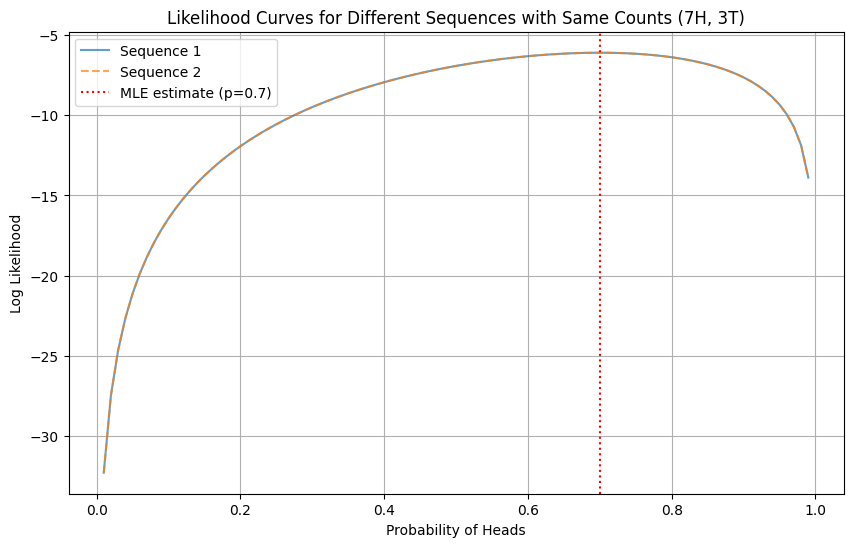


MLE estimate for sequence 1: p = 0.700
MLE estimate for sequence 2: p = 0.700


In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Test sequences
sequence1 = 'HTHTHHHHTH'
sequence2 = 'HHHHHHHTTT'

def get_counts(sequence):
    n_heads = sum(1 for x in sequence if x == 'H')
    n_tails = len(sequence) - n_heads
    return n_heads, n_tails

n_heads1, n_tails1 = get_counts(sequence1)
n_heads2, n_tails2 = get_counts(sequence2)

print(f"Sequence 1 ({sequence1}): {n_heads1} heads, {n_tails1} tails")
print(f"Sequence 2 ({sequence2}): {n_heads2} heads, {n_tails2} tails")

# Modified likelihood function without returning infinity
def neg_log_likelihood(p, n_heads, n_tails):
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities
ps = np.linspace(0.01, 0.99, 99)
likelihoods1 = [-neg_log_likelihood(p, n_heads1, n_tails1) for p in ps]
likelihoods2 = [-neg_log_likelihood(p, n_heads2, n_tails2) for p in ps]

plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods1, label='Sequence 1', alpha=0.7)
plt.plot(ps, likelihoods2, '--', label='Sequence 2', alpha=0.7)
plt.axvline(x=0.7, color='r', linestyle=':', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood Curves for Different Sequences with Same Counts (7H, 3T)')
plt.grid(True)
plt.legend()
plt.show()

# Find MLE with bounds to avoid warnings
result1 = minimize(lambda p: neg_log_likelihood(p[0], n_heads1, n_tails1),
                  x0=[0.5],
                  bounds=[(0.001, 0.999)]) # avoid exact 0 and 1
result2 = minimize(lambda p: neg_log_likelihood(p[0], n_heads2, n_tails2),
                  x0=[0.5],
                  bounds=[(0.001, 0.999)])

print(f"\nMLE estimate for sequence 1: p = {result1.x[0]:.3f}")
print(f"MLE estimate for sequence 2: p = {result2.x[0]:.3f}")

Observed: 10 ups, 0 downs in 10 days


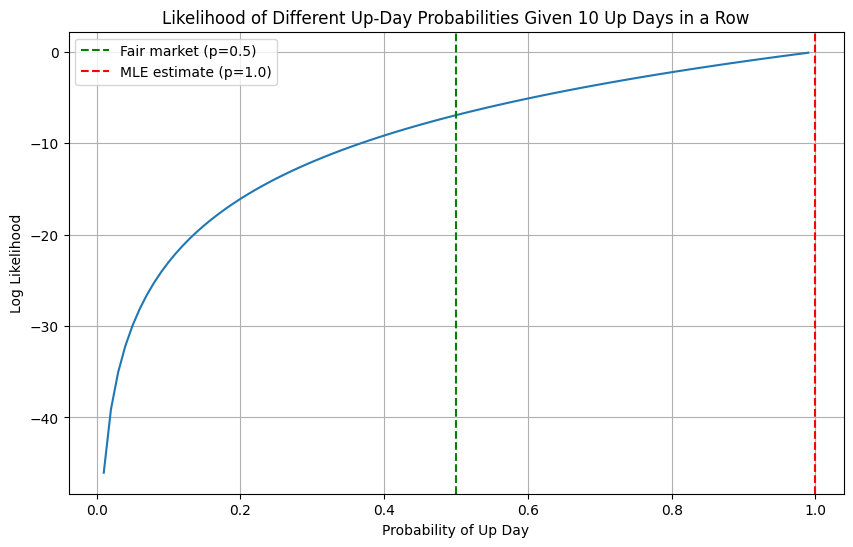


If p = 0.5:
Probability of seeing 10 ups in a row = 0.00097656

If p = 0.55:
Probability of seeing 10 ups in a row = 0.00253295

If p = 0.6:
Probability of seeing 10 ups in a row = 0.00604662

If p = 1.0:
Probability of seeing 10 ups in a row = 1.00000000

Given historical up probability of 0.535:
Probability of 10 ups in a row = 0.00192105


In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Our sequence: 10 ups in a row
sequence = 'UUUUUUUUUU'  # U for up
n_ups = sum(1 for x in sequence if x == 'U')
n_downs = len(sequence) - n_ups
print(f"Observed: {n_ups} ups, {n_downs} downs in {len(sequence)} days")

# Negative log likelihood function
def neg_log_likelihood(p, n_ups, n_downs):
    return -(n_ups * np.log(p) + n_downs * np.log(1-p))

# Test different probabilities
ps = np.linspace(0.01, 0.99, 99)
likelihoods = [-neg_log_likelihood(p, n_ups, n_downs) for p in ps]

# Plot likelihood for different probabilities
plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods)
plt.axvline(x=0.5, color='g', linestyle='--', label='Fair market (p=0.5)')
plt.axvline(x=1.0, color='r', linestyle='--', label='MLE estimate (p=1.0)')
plt.xlabel('Probability of Up Day')
plt.ylabel('Log Likelihood')
plt.title('Likelihood of Different Up-Day Probabilities Given 10 Up Days in a Row')
plt.grid(True)
plt.legend()
plt.show()

# Calculate probabilities for different p values
p_values = [0.5, 0.55, 0.6, 1.0]
for p in p_values:
    prob = p ** 10  # probability of 10 ups in a row
    print(f"\nIf p = {p}:")
    print(f"Probability of seeing 10 ups in a row = {prob:.8f}")

# Historical context - S&P 500 is up about 53.5% of days
p_historical = 0.535
prob_historical = p_historical ** 10
print(f"\nGiven historical up probability of {p_historical:.3f}:")
print(f"Probability of 10 ups in a row = {prob_historical:.8f}")

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from hmmlearn import hmm  # for EM implementation

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna() * 100

# Simple MLE - single regime
def neg_log_likelihood(params, returns):
    mu, sigma = params
    # returns is already flattened when passed to this function
    # No need to flatten again.
    return -np.sum(norm.logpdf(returns, mu, sigma))

# Fit single regime with MLE
initial_guess = [np.mean(returns), np.std(returns)]
# Pass returns as a NumPy array to minimize, and flatten it
result = minimize(neg_log_likelihood, initial_guess, args=(returns.values.flatten(),))
mle_mu, mle_sigma = result.x

# Fit two regimes with EM (using HMM)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(returns.values.reshape(-1, 1))

# Decode the regimes
hidden_states = model.predict(returns.values.reshape(-1, 1))

# Plot results
plt.figure(figsize=(15, 10))

# Top plot: Returns and regimes
plt.subplot(2, 1, 1)
plt.plot(returns.index, returns, 'b.', alpha=0.3, label='Daily Returns')
plt.axhline(y=mle_mu, color='r', linestyle='--', label='MLE Mean (Single Regime)')

# Plot different regimes with different colors
for i in range(2):
    mask = hidden_states == i
    plt.plot(returns.index[mask], returns[mask], '.',
             label=f'Regime {i+1}', alpha=0.7)

plt.title('SPY Returns: Single vs Two-Regime Model')
plt.legend()
plt.grid(True)

# Bottom plot: Regime probabilities
plt.subplot(2, 1, 2)
regime_probs = model.predict_proba(returns.values.reshape(-1, 1))
plt.plot(returns.index, regime_probs[:, 0], 'b', label='Regime 1 Probability')
plt.plot(returns.index, regime_probs[:, 1], 'r', label='Regime 2 Probability')
plt.title('Regime Probabilities Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSingle Regime (MLE):")
print(f"Mean: {mle_mu:.4f}")
print(f"Volatility: {mle_sigma:.4f}")

print("\nTwo Regimes (EM):")
for i in range(2):
    regime_returns = returns[hidden_states == i]
    print(f"\nRegime {i+1}:")
    print(f"Mean: {np.mean(regime_returns):.4f}")
    print(f"Volatility: {np.std(regime_returns):.4f}")
    print(f"Proportion of time: {np.mean(hidden_states == i):.2%}")

# Print transition matrix
print("\nRegime Transition Probabilities:")
print(pd.DataFrame(model.transmat_,
                  columns=['To Regime 1', 'To Regime 2'],
                  index=['From Regime 1', 'From Regime 2']))

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna() * 100

# Simple MLE - single regime
def neg_log_likelihood(params, returns):
    mu, sigma = params
    # Ensure returns is 1D numpy array
    returns_array = np.asarray(returns).flatten()
    # Ensure sigma is positive
    sigma = abs(sigma)
    return -np.sum(norm.logpdf(returns_array, mu, sigma))

# Fit single regime with MLE
initial_guess = [np.mean(returns), np.std(returns)]
result = minimize(neg_log_likelihood, initial_guess, args=(returns,), method='Nelder-Mead')
mle_mu, mle_sigma = result.x

# Convert returns to correct format for HMM
returns_reshaped = returns.values.reshape(-1, 1)

# Fit two regimes with EM (using HMM)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
model.fit(returns_reshaped)

# Decode the regimes
hidden_states = model.predict(returns_reshaped)
regime_probs = model.predict_proba(returns_reshaped)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Top plot: Returns and regimes
ax1.plot(returns.index, returns, 'b.', alpha=0.3, label='Daily Returns')
ax1.axhline(y=mle_mu, color='r', linestyle='--', label='MLE Mean (Single Regime)')

# Plot different regimes with different colors
for i in range(2):
    mask = hidden_states == i
    ax1.plot(returns.index[mask], returns[mask], '.',
             label=f'Regime {i+1}', alpha=0.7)

ax1.set_title('SPY Returns: Single vs Two-Regime Model')
ax1.legend()
ax1.grid(True)

# Bottom plot: Regime probabilities
ax2.plot(returns.index, regime_probs[:, 0], 'b', label='Regime 1 Probability')
ax2.plot(returns.index, regime_probs[:, 1], 'r', label='Regime 2 Probability')
ax2.set_title('Regime Probabilities Over Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSingle Regime (MLE):")
print(f"Mean: {mle_mu:.4f}")
print(f"Volatility: {abs(mle_sigma):.4f}")

print("\nTwo Regimes (EM):")
for i in range(2):
    regime_returns = returns[hidden_states == i]
    print(f"\nRegime {i+1}:")
    print(f"Mean: {np.mean(regime_returns):.4f}")
    print(f"Volatility: {np.std(regime_returns):.4f}")
    print(f"Proportion of time: {np.mean(hidden_states == i):.2%}")

# Print transition matrix
print("\nRegime Transition Probabilities:")
print(pd.DataFrame(model.transmat_,
                  columns=['To Regime 1', 'To Regime 2'],
                  index=['From Regime 1', 'From Regime 2']))

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

[*********************100%***********************]  1 of 1 completed


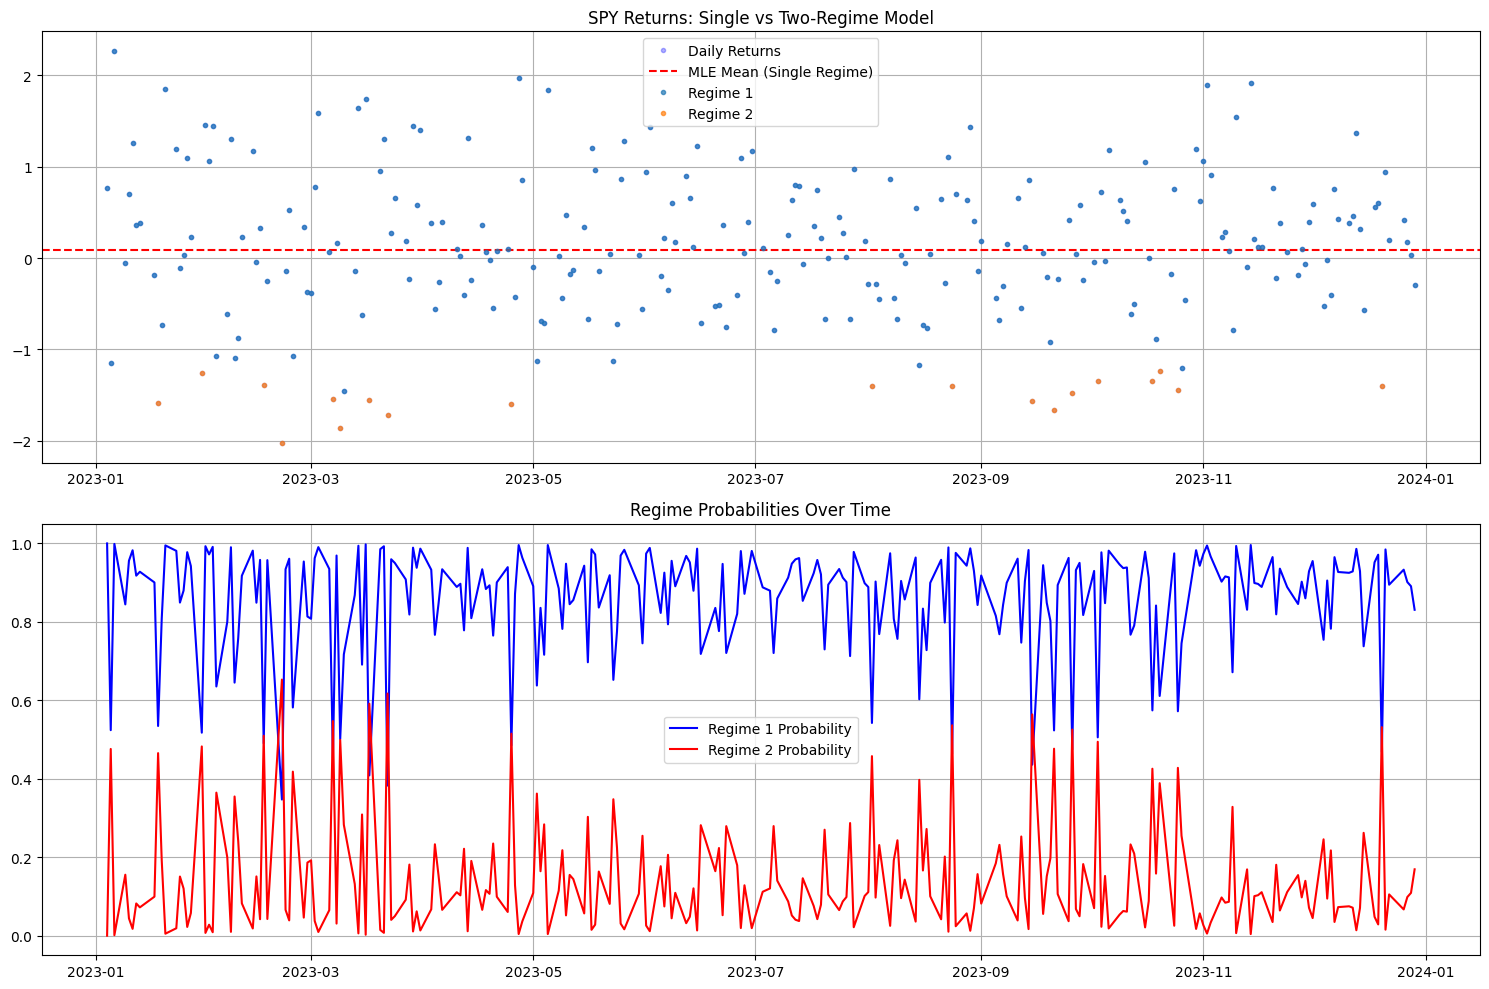


Single Regime (MLE):
Mean: 0.0890
Volatility: 0.8296

Two Regimes (EM):

Regime 1:
Mean: 0.2217
Volatility: 0.7150
Proportion of time: 92.37%

Regime 2:
Mean: -1.5171
Volatility: 0.1958
Proportion of time: 7.63%

Regime Transition Probabilities:
               To Regime 1  To Regime 2
From Regime 1     0.834238     0.165762
From Regime 2     0.992323     0.007677


In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna() * 100
returns = returns.values  # Convert to numpy array

# Simple MLE - single regime
def neg_log_likelihood(params, returns):
    mu, sigma = params
    # Ensure sigma is positive
    sigma = abs(sigma)
    return -np.sum(norm.logpdf(returns, mu, sigma))

# Fit single regime with MLE
initial_guess = np.array([float(np.mean(returns)), float(np.std(returns, ddof=1))])
result = minimize(neg_log_likelihood, initial_guess, args=(returns,), method='Nelder-Mead')
mle_mu, mle_sigma = result.x

# Convert returns to correct format for HMM
returns_reshaped = returns.reshape(-1, 1)

# Fit two regimes with EM (using HMM)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
model.fit(returns_reshaped)

# Decode the regimes
hidden_states = model.predict(returns_reshaped)
regime_probs = model.predict_proba(returns_reshaped)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Top plot: Returns and regimes
dates = df.index[1:]  # Skip first date due to return calculation
ax1.plot(dates, returns, 'b.', alpha=0.3, label='Daily Returns')
ax1.axhline(y=mle_mu, color='r', linestyle='--', label='MLE Mean (Single Regime)')

# Plot different regimes with different colors
for i in range(2):
    mask = hidden_states == i
    ax1.plot(dates[mask], returns[mask], '.',
             label=f'Regime {i+1}', alpha=0.7)

ax1.set_title('SPY Returns: Single vs Two-Regime Model')
ax1.legend()
ax1.grid(True)

# Bottom plot: Regime probabilities
ax2.plot(dates, regime_probs[:, 0], 'b', label='Regime 1 Probability')
ax2.plot(dates, regime_probs[:, 1], 'r', label='Regime 2 Probability')
ax2.set_title('Regime Probabilities Over Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSingle Regime (MLE):")
print(f"Mean: {mle_mu:.4f}")
print(f"Volatility: {abs(mle_sigma):.4f}")

print("\nTwo Regimes (EM):")
for i in range(2):
    regime_returns = returns[hidden_states == i]
    print(f"\nRegime {i+1}:")
    print(f"Mean: {np.mean(regime_returns):.4f}")
    print(f"Volatility: {np.std(regime_returns):.4f}")
    print(f"Proportion of time: {np.mean(hidden_states == i):.2%}")

# Print transition matrix
print("\nRegime Transition Probabilities:")
print(pd.DataFrame(model.transmat_,
                  columns=['To Regime 1', 'To Regime 2'],
                  index=['From Regime 1', 'From Regime 2']))

In [17]:
import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed


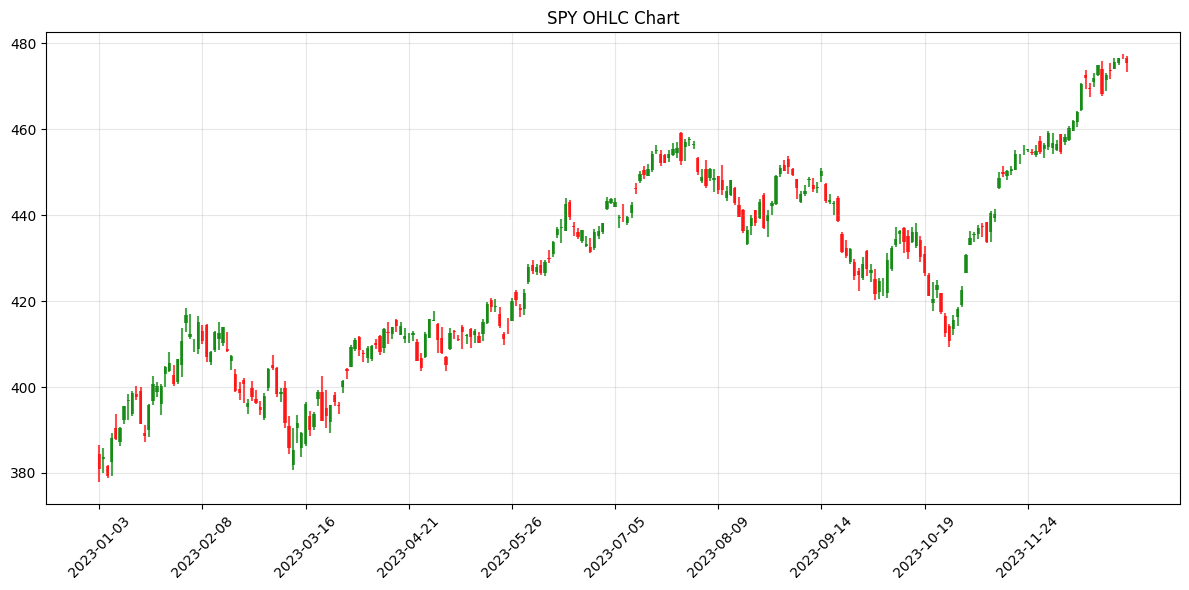


First 5 days of data:
Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2023-01-03  371.614410  380.820007  386.429993  377.829987  384.369995   
2023-01-04  374.483337  383.760010  385.880005  380.000000  383.179993   
2023-01-05  370.209259  379.380005  381.839996  378.760010  381.720001   
2023-01-06  378.698883  388.079987  389.250000  379.410004  382.609985   
2023-01-09  378.484192  387.859985  393.700012  387.670013  390.369995   

Price          Volume  
Ticker            SPY  
Date                   
2023-01-03   74850700  
2023-01-04   85934100  
2023-01-05   76970500  
2023-01-06  104189600  
2023-01-09   73978100  

Last 5 days of data:
Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                  

In [18]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# Create figure
fig, ax = plt.subplots(figsize=(12,6))

# Plot candles
for i in range(len(df)):
    # Get values for this day (convert to float)
    open_price = float(df['Open'].iloc[i])
    close = float(df['Close'].iloc[i])
    high = float(df['High'].iloc[i])
    low = float(df['Low'].iloc[i])

    # Determine color
    color = 'g' if close > open_price else 'r'

    # Plot candle body
    ax.bar(i, close - open_price, bottom=open_price, color=color,
           width=0.8, alpha=0.7)

    # Plot wick
    ax.vlines(i, low, high, color=color, alpha=0.7)

# Format x-axis
step = len(df) // 10
ax.set_xticks(range(0, len(df), step))
ax.set_xticklabels(df.index.strftime('%Y-%m-%d')[::step], rotation=45)

plt.title(f'{ticker} OHLC Chart')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFirst 5 days of data:")
print(df.head())
print("\nLast 5 days of data:")
print(df.tail())

[*********************100%***********************]  1 of 1 completed


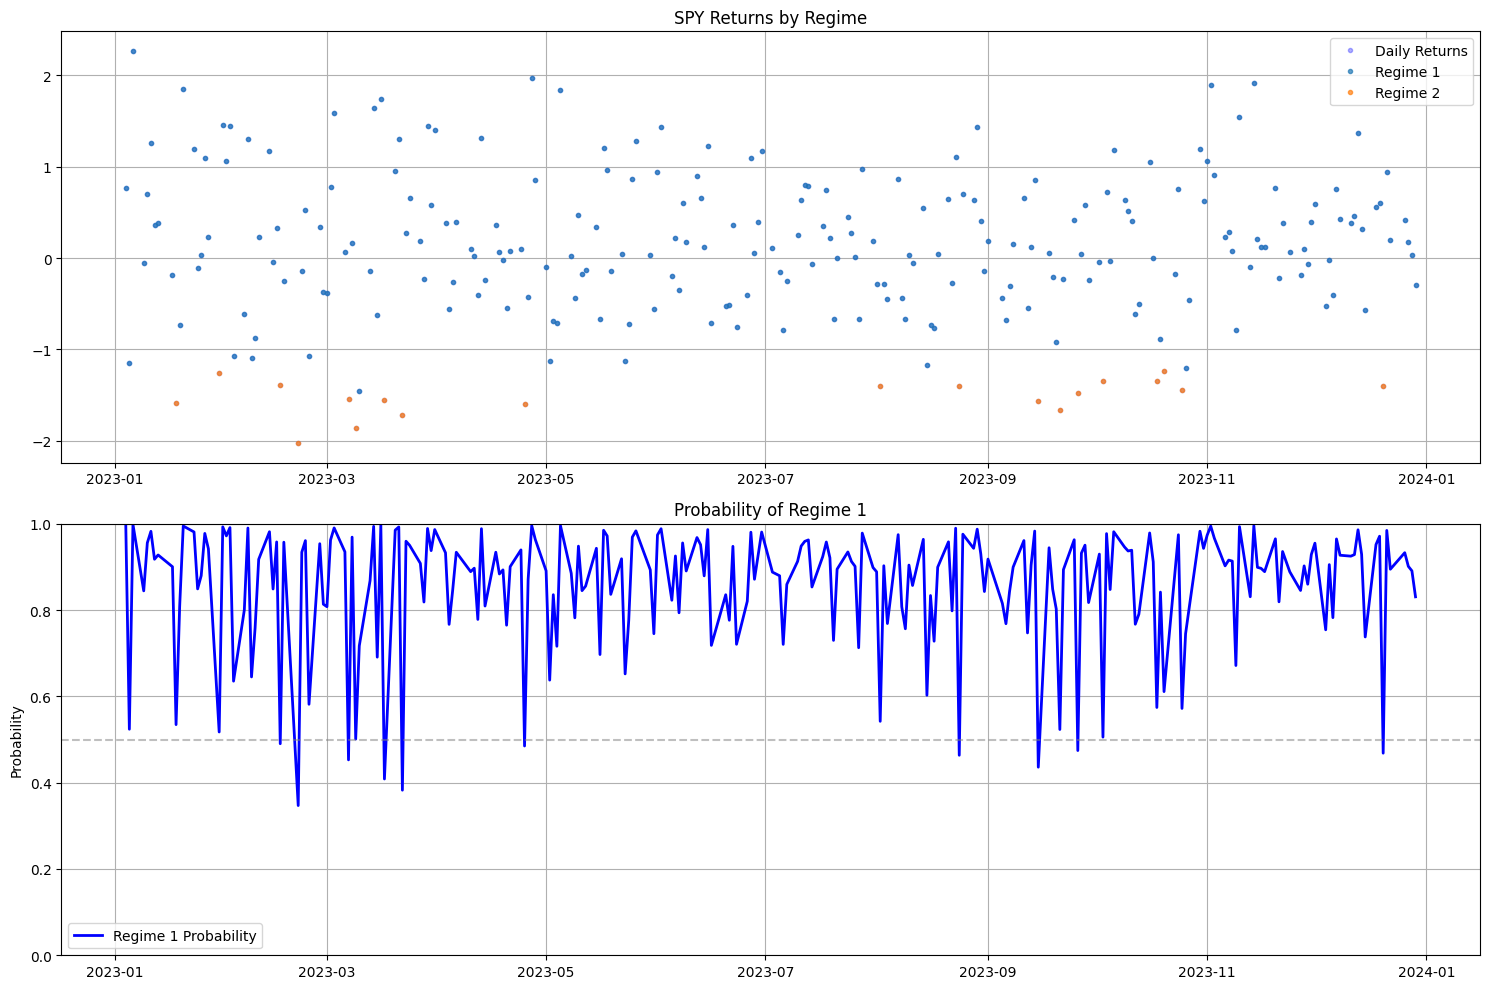


Regime Statistics:

Regime 1:
Mean Return: 0.2217
Volatility: 0.7150
Proportion of time: 92.37%

Regime 2:
Mean Return: -1.5171
Volatility: 0.1958
Proportion of time: 7.63%

Regime Transition Probabilities:
               To Regime 1  To Regime 2
From Regime 1     0.834238     0.165762
From Regime 2     0.992323     0.007677


In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna() * 100
returns = returns.values  # Convert to numpy array

# Convert returns to correct format for HMM
returns_reshaped = returns.reshape(-1, 1)

# Fit two regimes with EM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
model.fit(returns_reshaped)

# Decode the regimes
hidden_states = model.predict(returns_reshaped)
regime_probs = model.predict_proba(returns_reshaped)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Top plot: Returns and regimes
dates = df.index[1:]  # Skip first date due to return calculation
colors = ['red', 'green']
ax1.plot(dates, returns, 'b.', alpha=0.3, label='Daily Returns')

# Plot different regimes with different colors
for i in range(2):
   mask = hidden_states == i
   ax1.plot(dates[mask], returns[mask], '.',
            label=f'Regime {i+1}', alpha=0.7)

ax1.set_title('SPY Returns by Regime')
ax1.legend()
ax1.grid(True)

# Bottom plot: Regime 1 probability only
ax2.plot(dates, regime_probs[:, 0], 'b-', label='Regime 1 Probability', linewidth=2)
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)  # Add reference line at 0.5
ax2.set_title('Probability of Regime 1')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 1)  # Force y-axis from 0 to 1

plt.tight_layout()
plt.show()

# Print regime statistics
print("\nRegime Statistics:")
for i in range(2):
   regime_returns = returns[hidden_states == i]
   print(f"\nRegime {i+1}:")
   print(f"Mean Return: {np.mean(regime_returns):.4f}")
   print(f"Volatility: {np.std(regime_returns):.4f}")
   print(f"Proportion of time: {np.mean(hidden_states == i):.2%}")

print("\nRegime Transition Probabilities:")
print(pd.DataFrame(model.transmat_,
                 columns=['To Regime 1', 'To Regime 2'],
                 index=['From Regime 1', 'From Regime 2']))

[*********************100%***********************]  1 of 1 completed


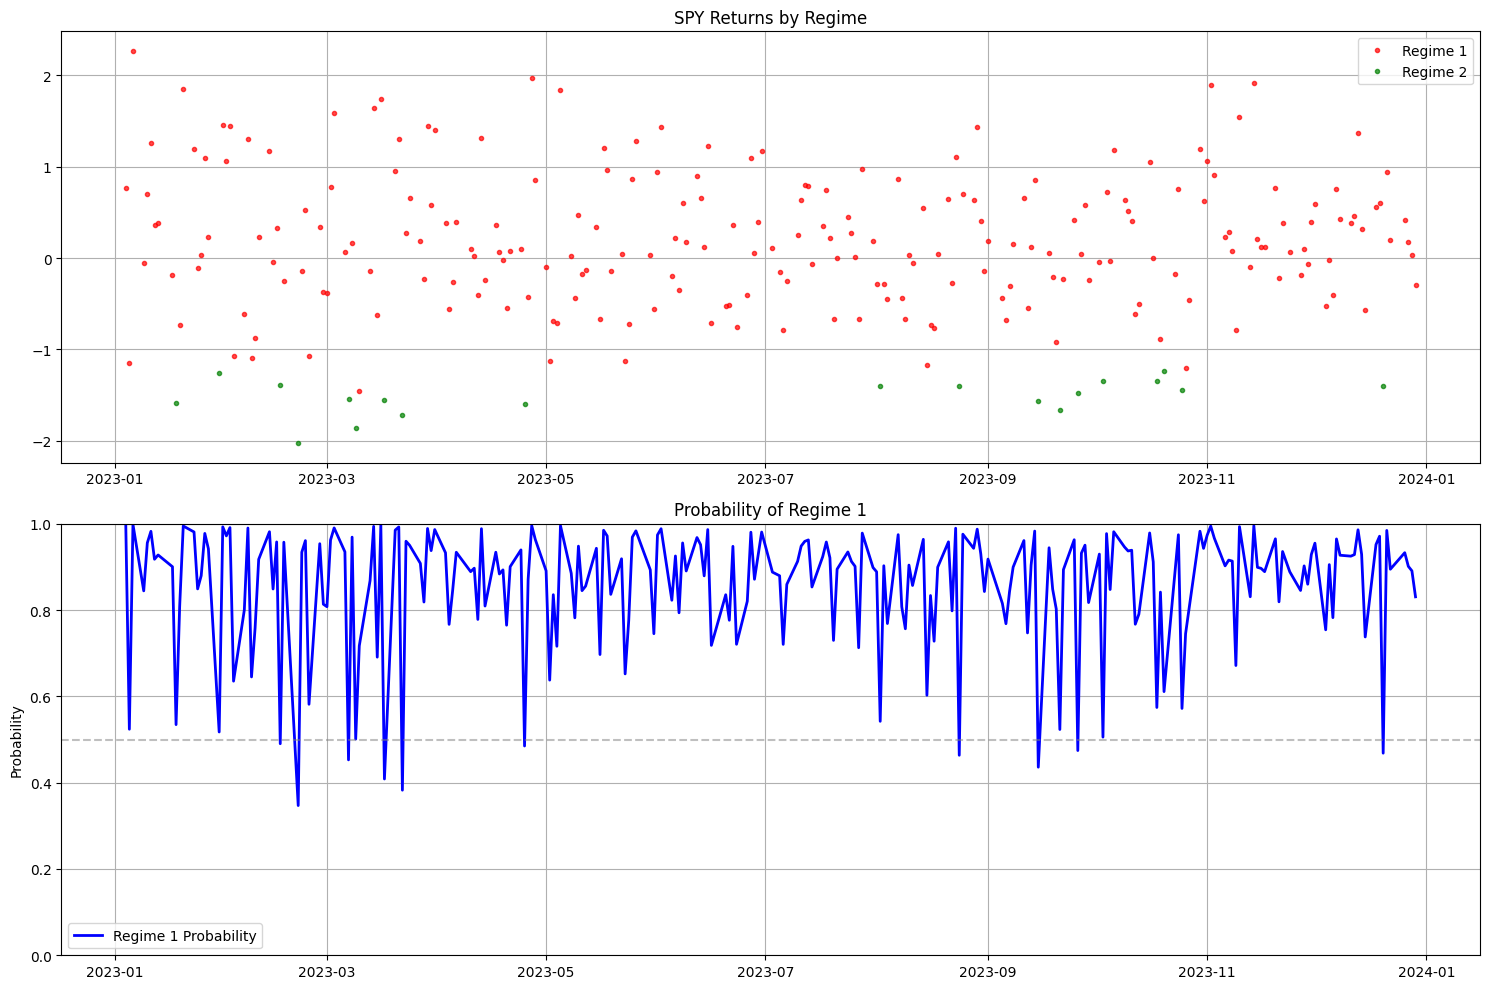


Regime Statistics:

Regime 1:
Mean Return: 0.2217
Volatility: 0.7150
Proportion of time: 92.37%

Regime 2:
Mean Return: -1.5171
Volatility: 0.1958
Proportion of time: 7.63%

Regime Transition Probabilities:
               To Regime 1  To Regime 2
From Regime 1     0.834238     0.165762
From Regime 2     0.992323     0.007677


In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna() * 100
returns = returns.values

returns_reshaped = returns.reshape(-1, 1)

# Fit two regimes with EM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
model.fit(returns_reshaped)

hidden_states = model.predict(returns_reshaped)
regime_probs = model.predict_proba(returns_reshaped)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Returns plot - now just colored by regime, no blue dots
dates = df.index[1:]
colors = ['red', 'green']  # Define distinct colors for regimes
for i in range(2):
    mask = hidden_states == i
    ax1.plot(dates[mask], returns[mask], '.',
             color=colors[i], label=f'Regime {i+1}', alpha=0.7)

ax1.set_title('SPY Returns by Regime')
ax1.legend()
ax1.grid(True)

# Regime probability plot
ax2.plot(dates, regime_probs[:, 0], 'b-', label='Regime 1 Probability', linewidth=2)
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.set_title('Probability of Regime 1')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print regime statistics
print("\nRegime Statistics:")
for i in range(2):
    regime_returns = returns[hidden_states == i]
    print(f"\nRegime {i+1}:")
    print(f"Mean Return: {np.mean(regime_returns):.4f}")
    print(f"Volatility: {np.std(regime_returns):.4f}")
    print(f"Proportion of time: {np.mean(hidden_states == i):.2%}")

print("\nRegime Transition Probabilities:")
print(pd.DataFrame(model.transmat_,
                  columns=['To Regime 1', 'To Regime 2'],
                  index=['From Regime 1', 'From Regime 2']))